In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [2]:
(xtrain,ytrain),(xtest,ytest)=datasets.cifar10.load_data()

In [3]:
xtrain[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [4]:
xtrain.shape

(50000, 32, 32, 3)

In [5]:
xtest.shape

(10000, 32, 32, 3)

In [6]:
ytrain[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
ytrain=ytrain.reshape(-1,)
ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
def plot_sample(x,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

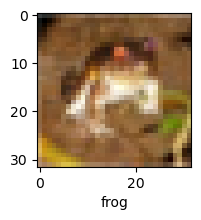

In [10]:
plot_sample(xtrain,ytrain,0)

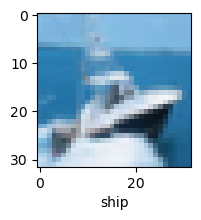

In [11]:
plot_sample(xtrain,ytrain,8)

In [12]:
# Vale normalization
xtrain=xtrain/255
xtest=xtest/255

# Model Building and Training

In [13]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])


ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])


ann.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 136s 86ms/step - loss: 1.8126 - accuracy: 0.3566
Epoch 2/5
1563/1563 [==============================] - 134s 86ms/step - loss: 1.6231 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 134s 86ms/step - loss: 1.5407 - accuracy: 0.4567
Epoch 4/5
1563/1563 [==============================] - 134s 86ms/step - loss: 1.4825 - accuracy: 0.4794
Epoch 5/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.4333 - accuracy: 0.4966


In [14]:
cnn=models.Sequential([
    #cnn
    
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [16]:
 cnn.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 69s 43ms/step - loss: 1.4832 - accuracy: 0.4624
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1200 - accuracy: 0.6075
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9927 - accuracy: 0.6560
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9128 - accuracy: 0.6842
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8517 - accuracy: 0.7045
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7992 - accuracy: 0.7225
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7613 - accuracy: 0.7357
Epoch 8/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7219 - accuracy: 0.7489
Epoch 9/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6928 - accuracy: 0.7585
Epoch 10/10
1563/1563 [==============================] - 66s 42m

In [17]:
cnn.evaluate(xtest,ytest)

313/313 [==============================] - 6s 17ms/step - loss: 0.9202 - accuracy: 0.6897


[0.9201999306678772, 0.6897000074386597]

In [40]:
ytest=ytest.reshape(-1)
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

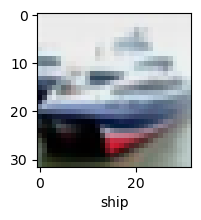

In [41]:
plot_sample(xtest,ytest,1)

In [42]:
ypred=cnn.predict(xtest)
ypred[:5]

313/313 [==============================] - 5s 16ms/step


array([[2.87702796e-03, 1.04426220e-03, 1.60880964e-02, 6.53856933e-01,
        2.71067984e-04, 1.72789060e-02, 9.01403576e-02, 7.52250271e-05,
        2.10805386e-01, 7.56275980e-03],
       [6.11126365e-04, 5.83086920e-04, 1.16694753e-06, 9.05734581e-08,
        2.00988737e-09, 6.62854938e-10, 4.61056882e-09, 8.43767625e-11,
        9.98804092e-01, 4.42526385e-07],
       [5.12578525e-02, 7.88069516e-02, 2.13213568e-03, 5.30296704e-03,
        2.77213228e-04, 4.13064408e-04, 2.64853676e-04, 3.89721099e-04,
        8.56884181e-01, 4.27104393e-03],
       [8.27070355e-01, 4.71083745e-02, 3.69828790e-02, 3.57970712e-03,
        7.39482231e-03, 4.04656384e-05, 6.53647468e-04, 1.17217016e-04,
        7.69450665e-02, 1.07462460e-04],
       [1.76937192e-05, 2.01922128e-04, 9.71498340e-02, 1.72022171e-02,
        8.22973788e-01, 7.33458437e-03, 5.48148155e-02, 9.53317940e-05,
        3.13947203e-05, 1.78416711e-04]], dtype=float32)

In [43]:
y_classes=[np.argmax(element) for element in ypred]
y_classes[:5]

[3, 8, 8, 0, 4]

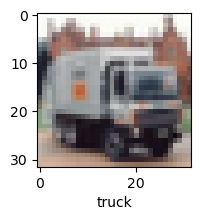

In [62]:
plot_sample(xtest,ytest,11)

In [63]:
classes[y_classes[11]]

'truck'